In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
Raw_Data = pd.read_csv(r'athlete_events.csv')
Raw_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [259]:
Raw_Data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
#We look into what teams we have in the dataset
print("Teams in Dataset:")
print(Raw_Data.Team.unique())

print("\nYears in Dataset:")
#Let`s check, that all the years are present
print(np.sort(Raw_Data.Year.unique()))

#Sports played on the Olympics over the years
print("\nSports in Dataset:")
print(Raw_Data.Sport.unique())

Teams in Dataset:
['China' 'Denmark' 'Denmark/Sweden' ... 'Solos Carex' 'Dow Jones' 'Digby']

Years in Dataset:
[1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016]

Sports in Dataset:
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugb

In [8]:
Clean_Data = Raw_Data[['Name', 'Team', 'Games', 'Year', 'Sport', 'Event', 'Medal']]
Clean_Data.head()

,Name,Team,Games,Year,Sport,Event,Medal
0,A Dijiang,China,1992 Summer,1992,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,China,2012 Summer,2012,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,Denmark,1920 Summer,1920,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,Denmark/Sweden,1900 Summer,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,Netherlands,1988 Winter,1988,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
%load_ext sql
!pip install -U pandasql

Requirement already up-to-date: pandasql in c:\programdata\anaconda3\lib\site-packages (0.7.3)


In [301]:
from pandasql import sqldf
soviet = sqldf("SELECT * FROM Clean_Data WHERE TEAM in ('China','Soviet Union', 'East Germany','Bulgaria', 'Romania', 'Hungary', 'Yugoslavia','Poland','Czechoslovakia','Cuba');")
soviet = sqldf("SELECT * FROM soviet WHERE MEDAL != 'None' AND YEAR >= '1952';")
soviet[["Team", "Medal", "Sport"]] = soviet[["Team", "Medal", "Sport"]].astype(str) 
soviet[["Year"]] = soviet[["Year"]].astype(int) 
soviet.head()


,Name,Team,Games,Year,Sport,Event,Medal
0,Pter Abay,Hungary,1992 Summer,1992,Fencing,"Fencing Men's Sabre, Team",Silver
1,Zagalav Abdulbekovich Abdulbekov,Soviet Union,1972 Summer,1972,Wrestling,"Wrestling Men's Featherweight, Freestyle",Gold
2,Irene Abel,East Germany,1972 Summer,1972,Gymnastics,Gymnastics Women's Team All-Around,Silver
3,Ismail Abilov (-Nizamolu),Bulgaria,1980 Summer,1980,Wrestling,"Wrestling Men's Middleweight, Freestyle",Gold
4,Viktor Andreyevich Aboimov,Soviet Union,1972 Summer,1972,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver


In [308]:
def yearly_medals(year:int):
    filtr = soviet.loc[soviet['Year'] == year]
    table = sqldf('SELECT YEAR, TEAM, COUNT(TEAM) AS Medal_Count FROM filtr GROUP BY TEAM;')
       
    fig, ax = plt.subplots()

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(10))
    
    ax.pie(table['Medal_Count'], colors=outer_colors, labels=table['Team'],
           wedgeprops=dict(edgecolor='w'), autopct="")

    ax.legend(table['Team'],
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))


    ax.set(aspect="equal", title='Soviet medal distribution')
    plt.show()
    return table


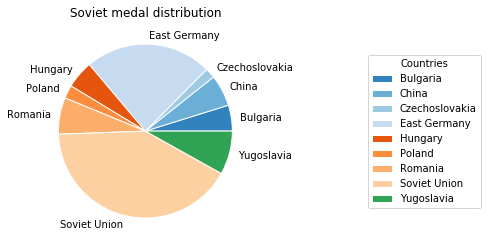

,Year,Team,Medal_Count
0,1988,Bulgaria,41
1,1988,China,50
2,1988,Czechoslovakia,16
3,1988,East Germany,201
4,1988,Hungary,44
5,1988,Poland,21
6,1988,Romania,58
7,1988,Soviet Union,352
8,1988,Yugoslavia,69


In [345]:
yearly_medals(1988)

In [14]:
table = pd.pivot_table(soviet, values='Medal', index=['Sport'],
                    columns=['Team'], aggfunc=lambda x: len(x))
table = table.fillna(0)
table.head()


Team,Bulgaria,China,Cuba,Czechoslovakia,East Germany,Hungary,Poland,Romania,Soviet Union,Yugoslavia
Sport,,,,,,,,,,
Alpine Skiing,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
Archery,0.0,19.0,0.0,0.0,0.0,0.0,4.0,0.0,7.0,0.0
Art Competitions,0.0,0.0,0.0,3.0,0.0,5.0,8.0,0.0,0.0,0.0
Athletics,19.0,27.0,58.0,24.0,140.0,35.0,72.0,35.0,242.0,2.0
Badminton,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
table_p = pd.pivot_table(soviet, values='Medal', index=['Team'],
                    columns=['Sport'], aggfunc=lambda x: len(x))
table_p = table_p.fillna(0)
table_p.head()

Sport,Alpine Skiing,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Biathlon,Boxing,Canoeing,...,Swimming,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampolining,Volleyball,Water Polo,Weightlifting,Wrestling
Team,,,,,,,,,,,,,,,,,,,,,
Bulgaria,0.0,0.0,0.0,19.0,0.0,0.0,24.0,2.0,18.0,28.0,...,3.0,0.0,0.0,0.0,1.0,0.0,22.0,0.0,36.0,69.0
China,0.0,19.0,0.0,27.0,24.0,0.0,23.0,0.0,12.0,4.0,...,70.0,31.0,51.0,10.0,0.0,11.0,66.0,0.0,57.0,10.0
Cuba,0.0,0.0,0.0,58.0,0.0,112.0,12.0,0.0,73.0,5.0,...,2.0,0.0,0.0,5.0,0.0,0.0,52.0,0.0,5.0,22.0
Czechoslovakia,1.0,0.0,3.0,24.0,0.0,0.0,0.0,0.0,6.0,16.0,...,0.0,0.0,0.0,0.0,5.0,0.0,23.0,0.0,8.0,15.0
East Germany,0.0,0.0,0.0,140.0,0.0,0.0,0.0,20.0,13.0,50.0,...,152.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,11.0,7.0


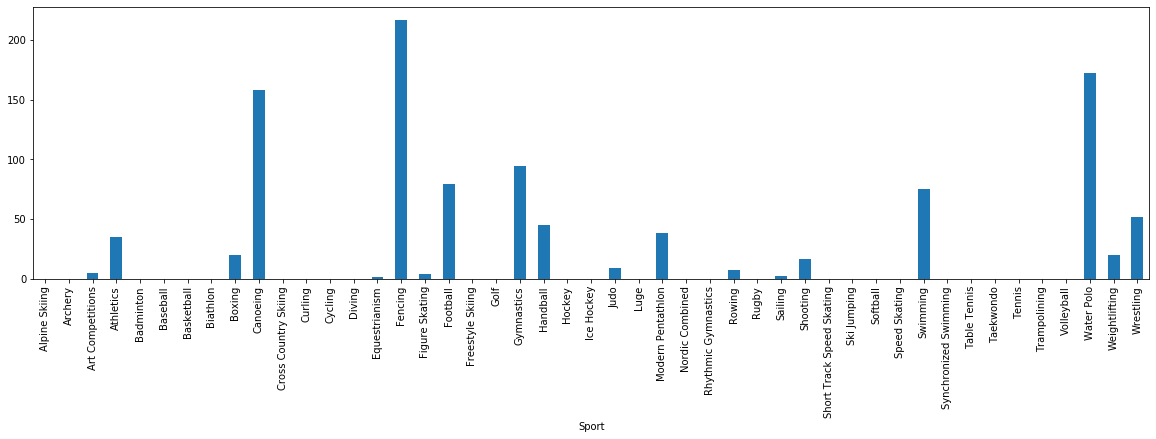

In [77]:
table['Hungary'].plot(kind='bar', figsize=(20,5))

In [277]:
capital = sqldf("SELECT * FROM Clean_Data WHERE TEAM NOT in ('China','Soviet Union', 'East Germany','Bulgaria', 'Romania', 'Hungary', 'Yugoslavia','Poland','Czechoslovakia','Cuba');")
capital = sqldf("SELECT * FROM capital WHERE MEDAL != 'None' AND YEAR >= '1952';")
capital[["Team", "Medal", "Sport"]] = capital[["Team", "Medal", "Sport"]].astype(str) 
capital.head()

,Name,Team,Games,Year,Sport,Event,Medal
0,Juhamatti Tapio Aaltonen,Finland,2014 Winter,2014,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1,Paavo Johannes Aaltonen,Finland,1952 Summer,1952,Gymnastics,Gymnastics Men's Team All-Around,Bronze
2,Kjetil Andr Aamodt,Norway,1992 Winter,1992,Alpine Skiing,Alpine Skiing Men's Super G,Gold
3,Kjetil Andr Aamodt,Norway,1992 Winter,1992,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
4,Kjetil Andr Aamodt,Norway,1994 Winter,1994,Alpine Skiing,Alpine Skiing Men's Downhill,Silver


In [318]:
def yearly_medals_cap(year:int):
    filt = capital.loc[capital['Year'] == year]
    table1 = sqldf('SELECT YEAR, TEAM, COUNT(TEAM) AS Medal_Count FROM filt GROUP BY TEAM;')
    table1 = sqldf('SELECT * FROM table1 WHERE Medal_Count >= "20" GROUP BY TEAM;')
    
    fig, ax = plt.subplots()

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(10))
    
    ax.pie(table1['Medal_Count'], colors=outer_colors, labels=table1['Team'],
           wedgeprops=dict(edgecolor='w'), autopct="")

    ax.legend(table1['Team'],
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))


    ax.set(aspect="equal", title='Capitalist medal distribution')
    plt.show()
    return table1

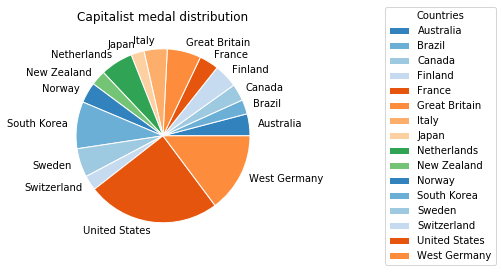

,Year,Team,Medal_Count
0,1988,Australia,35
1,1988,Brazil,23
2,1988,Canada,27
3,1988,Finland,38
4,1988,France,31
5,1988,Great Britain,54
6,1988,Italy,37
7,1988,Japan,21
8,1988,Netherlands,52
9,1988,New Zealand,24


In [337]:
yearly_medals_cap(1988)

In [65]:
table_dis_cap = sqldf('SELECT TEAM AS T, COUNT(TEAM) AS Medal_Count FROM capital GROUP BY TEAM ;')
table_dis_cap = sqldf('SELECT * FROM table_dis_cap WHERE Medal_Count > "10";')
table_dis_cap.head()

,T,Medal_Count
0,Algeria,17
1,Angelita,12
2,Argentina,266
3,Armenia,16
4,Australia,1285


In [69]:
table_cap = sqldf('SELECT * FROM capital JOIN table_dis_cap ON table_dis_cap.T = capital.Team;')
table_cap = table_cap[["Team", "Medal", "Sport"]]
table_p = pd.pivot_table(table_cap, values='Medal', index=['Sport'],
                    columns=['Team'], aggfunc=lambda x: len(x))
table_p = table_p.fillna(0)
table_p.head()

Team,Algeria,Angelita,Argentina,Armenia,Australia,Austria,Austria-1,Azerbaijan,Bahamas,Belarus,...,Unified Team,United States,United States-1,United States-2,Uruguay,Uzbekistan,Venezuela,West Germany,West Germany-1,Zimbabwe
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alpine Skiing,0.0,0.0,0.0,0.0,1.0,114.0,0.0,0.0,0.0,0.0,...,0.0,44.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
Alpinism,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Archery,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,4.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Art Competitions,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


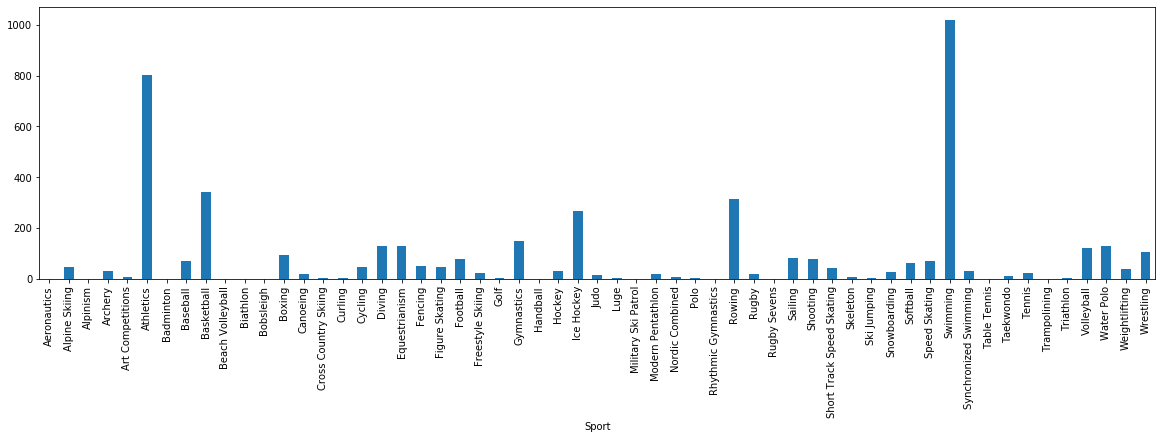

In [115]:
table_p['United States'].plot(kind='bar', figsize=(20,5))

In [80]:
table_pc = pd.pivot_table(table_cap, values='Medal', index=['Team'],
                    columns=['Sport'], aggfunc=lambda x: len(x))
table_pc = table_pc.fillna(0)
table_pc.head()

Sport,Aeronautics,Alpine Skiing,Alpinism,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,...,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
Team,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angelita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,24.0,0.0,...,0.0,0.0,1.0,7.0,0.0,0.0,12.0,0.0,2.0,0.0
Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0
Australia,0.0,1.0,1.0,5.0,0.0,80.0,0.0,24.0,60.0,0.0,...,0.0,0.0,2.0,9.0,1.0,5.0,0.0,39.0,4.0,3.0


In [411]:
capital_top10 = sqldf("SELECT * FROM capital WHERE TEAM in ('United States','Australia', 'West Germany','Japan', 'Italy', 'Great Britain', 'Canada','France','Sweden','Norway');")
capital_top10 = sqldf("SELECT * FROM capital_top10 WHERE MEDAL != 'None' AND YEAR IN ('1956', '1960', '1964', '1968', '1972', '1976', '1988');")
capital_top10 = sqldf("SELECT * FROM capital_top10 WHERE SPORT in ( 'Athletics', 'Gymnastics', 'Swimming', 'Basketball', 'Football','Cycling','Hockey', 'Ice Hockey', 'Handball', 'Water Polo', 'Weightlifting', 'Rowing', 'Fencing');")
capital_top10[["Team", "Medal", "Sport"]] = capital_top10[["Team", "Medal", "Sport"]].astype(str) 
capital_top10.head()

,Name,Team,Games,Year,Sport,Event,Medal
0,Ren Abadie,France,1956 Summer,1956,Cycling,"Cycling Men's Road Race, Team",Gold
1,Agostino Abbagnale,Italy,1988 Summer,1988,Rowing,Rowing Men's Quadruple Sculls,Gold
2,Carmine Abbagnale,Italy,1988 Summer,1988,Rowing,Rowing Men's Coxed Pairs,Gold
3,Giuseppe Abbagnale,Italy,1988 Summer,1988,Rowing,Rowing Men's Coxed Pairs,Gold
4,Ginko Abukawa-Chiba,Japan,1964 Summer,1964,Gymnastics,Gymnastics Women's Team All-Around,Bronze


In [412]:
top10_pivot = pd.pivot_table(capital_top10, values='Medal', index=['Team'],
                    columns=['Sport'], aggfunc=lambda x: len(x))
top10_pivot = top10_pivot.fillna(0)
top10_pivot.head(11)

Sport,Athletics,Basketball,Cycling,Fencing,Football,Gymnastics,Handball,Hockey,Ice Hockey,Rowing,Swimming,Water Polo,Weightlifting
Team,,,,,,,,,,,,,
Australia,39.0,0.0,14.0,0.0,0.0,0.0,0.0,59.0,0.0,21.0,111.0,0.0,0.0
Canada,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,24.0,45.0,0.0,0.0
France,23.0,0.0,20.0,57.0,0.0,1.0,0.0,0.0,0.0,12.0,4.0,0.0,2.0
Great Britain,66.0,0.0,17.0,9.0,0.0,0.0,0.0,16.0,0.0,20.0,17.0,0.0,2.0
Italy,13.0,0.0,51.0,87.0,0.0,11.0,0.0,0.0,0.0,33.0,4.0,23.0,4.0
Japan,2.0,0.0,0.0,0.0,16.0,110.0,0.0,0.0,0.0,0.0,27.0,0.0,9.0
Norway,3.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,0.0,12.0,0.0,0.0,1.0
Sweden,6.0,0.0,14.0,5.0,0.0,8.0,0.0,0.0,39.0,5.0,4.0,0.0,1.0
United States,241.0,108.0,1.0,1.0,0.0,2.0,0.0,0.0,51.0,86.0,380.0,24.0,17.0


In [413]:
soviet_top10 = sqldf("SELECT * FROM soviet WHERE YEAR IN ('1956', '1960', '1964', '1968', '1972', '1976', '1988');")
soviet_top10 = sqldf("SELECT * FROM soviet_top10 WHERE SPORT in ( 'Athletics', 'Gymnastics', 'Swimming', 'Basketball', 'Rowing', 'Fencing', 'Football','Cycling','Hockey', 'Ice Hockey', 'Handball', 'Water Polo', 'Weightlifting');")
soviet_top10[["Team", "Medal", "Sport"]] = soviet_top10[["Team", "Medal", "Sport"]].astype(str) 
sov_top10_pivot = pd.pivot_table(soviet_top10, values='Medal', index=['Team'],
                    columns=['Sport'], aggfunc=lambda x: len(x))
sov_top10_pivot = sov_top10_pivot.fillna(0)
sov_top10_pivot.head(11)

Sport,Athletics,Basketball,Cycling,Fencing,Football,Gymnastics,Handball,Ice Hockey,Rowing,Swimming,Water Polo,Weightlifting
Team,,,,,,,,,,,,
Bulgaria,12.0,12.0,0.0,0.0,32.0,3.0,0.0,0.0,14.0,3.0,0.0,16.0
China,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,14.0,4.0,0.0,5.0
Cuba,17.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Czechoslovakia,12.0,0.0,5.0,0.0,17.0,28.0,16.0,72.0,37.0,0.0,0.0,1.0
East Germany,102.0,0.0,23.0,1.0,34.0,65.0,14.0,0.0,129.0,110.0,0.0,8.0
Hungary,17.0,0.0,0.0,105.0,64.0,28.0,14.0,0.0,4.0,11.0,70.0,15.0
Poland,39.0,0.0,16.0,42.0,34.0,6.0,14.0,0.0,1.0,1.0,0.0,19.0
Romania,14.0,0.0,0.0,17.0,0.0,40.0,29.0,0.0,44.0,2.0,0.0,1.0
Soviet Union,166.0,108.0,40.0,122.0,70.0,213.0,57.0,128.0,91.0,84.0,67.0,47.0


In [174]:
from scipy import stats
stats.pearsonr(sov_top10_pivot['Athletics'], sov_top10_pivot['Gymnastics'])

(0.8732238577343971, 0.0009671186424808193)

In [414]:
def soviet_by_sport(year:int, team:str):
    fill = soviet_top10.loc[soviet_top10['Year'] == year]
    filt = fill.loc[fill['Team'] == team]
    table1 = sqldf('SELECT YEAR, SPORT, COUNT(SPORT) AS Medal_Count FROM filt GROUP BY SPORT;')
    
    fig, ax = plt.subplots()

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(10))
    
    ax.pie(table1['Medal_Count'], colors=outer_colors, labels=table1['Sport'],
           wedgeprops=dict(edgecolor='w'), autopct="")

    ax.legend(table1['Sport'],
          title="Disciplines",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))


    ax.set(aspect="equal", title='Soviet discipline distribution')
    plt.show()
    return table1

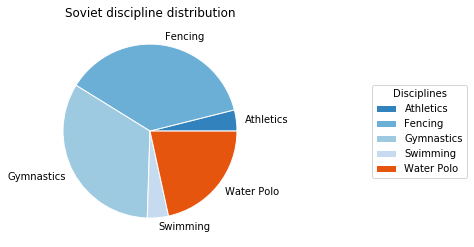

,Year,Sport,Medal_Count
0,1956,Athletics,2
1,1956,Fencing,19
2,1956,Gymnastics,17
3,1956,Swimming,2
4,1956,Water Polo,11


In [410]:
soviet_by_sport(1956, 'Hungary')

In [415]:
def capital_by_sport(year:int, team:str):
    fill = capital_top10.loc[capital_top10['Year'] == year]
    filt = fill.loc[fill['Team'] == team]
    table2 = sqldf('SELECT YEAR, SPORT, COUNT(SPORT) AS Medal_Count FROM filt GROUP BY SPORT;')
            
    fig, ax = plt.subplots()

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(10))
    
    ax.pie(table2['Medal_Count'], colors=outer_colors, labels=table2['Sport'],
           wedgeprops=dict(edgecolor='w'), autopct="")

    ax.legend(table2['Sport'],
          title="Disciplines",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))


    ax.set(aspect="equal", title='Capitalist discipline distribution')
    plt.show()
    return table2

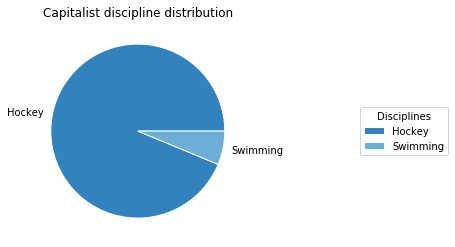

,Year,Sport,Medal_Count
0,1976,Hockey,15
1,1976,Swimming,1


In [417]:
capital_by_sport(1976, 'Australia')

In [440]:
stats.pearsonr(top10_pivot['Athletics'], top10_pivot['Fencing'])

(-0.1807112097703605, 0.6173525703941193)

In [439]:
stats.pearsonr(sov_top10_pivot['Athletics'], sov_top10_pivot['Fencing'])

(0.5772569655546405, 0.0805767271959232)